# H-He Mixture Simulation

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas','examples'))

input_file_name = os.path.join(example_directory, 'BIM_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  bim
Job directory:  Simulations/bim
Equilibration dumps directory:  Simulations/bim/Equilibration/dumps
Production dumps directory:  Simulations/bim/Production/dumps

Units:  cgs
Total No. of particles =  2500

Particle Species:
No. of species =  2
Species 1 : H
	Species ID: 0
	No. of particles = 625 
	Number density = 4.050000e+27 [N/cc]
	Mass = 1.672



Equilibration Time: 0 hrs 2 min 29 sec

------------- Production -------------




Production Time: 0 hrs 10 min 44 sec

Total Time: 0 hrs 13 min 16 sec


In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

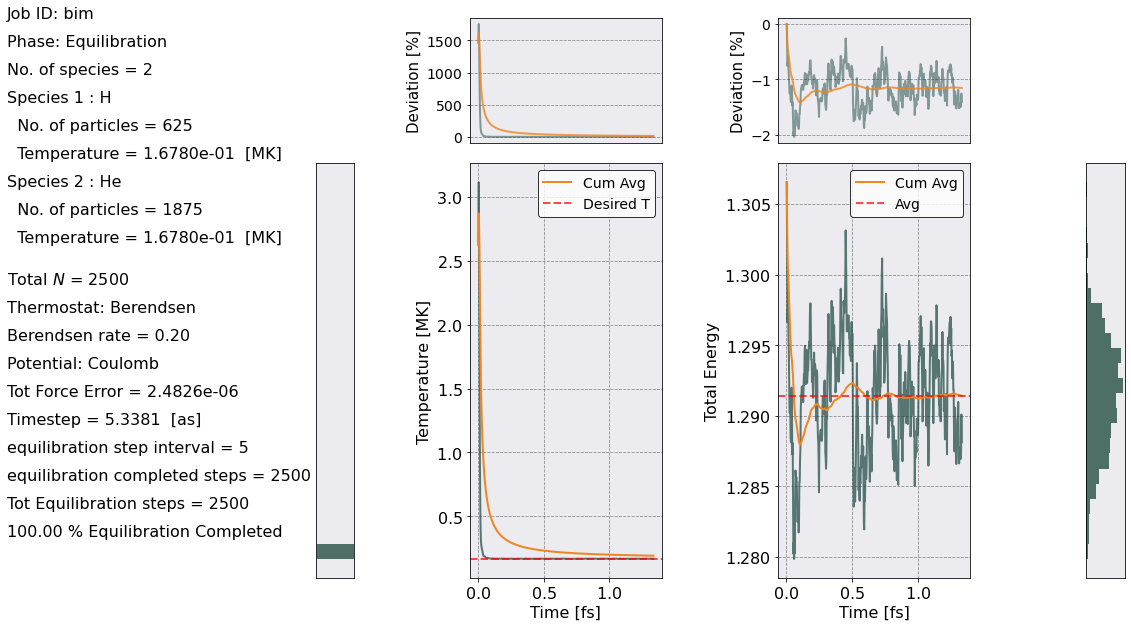

In [4]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='equilibration')


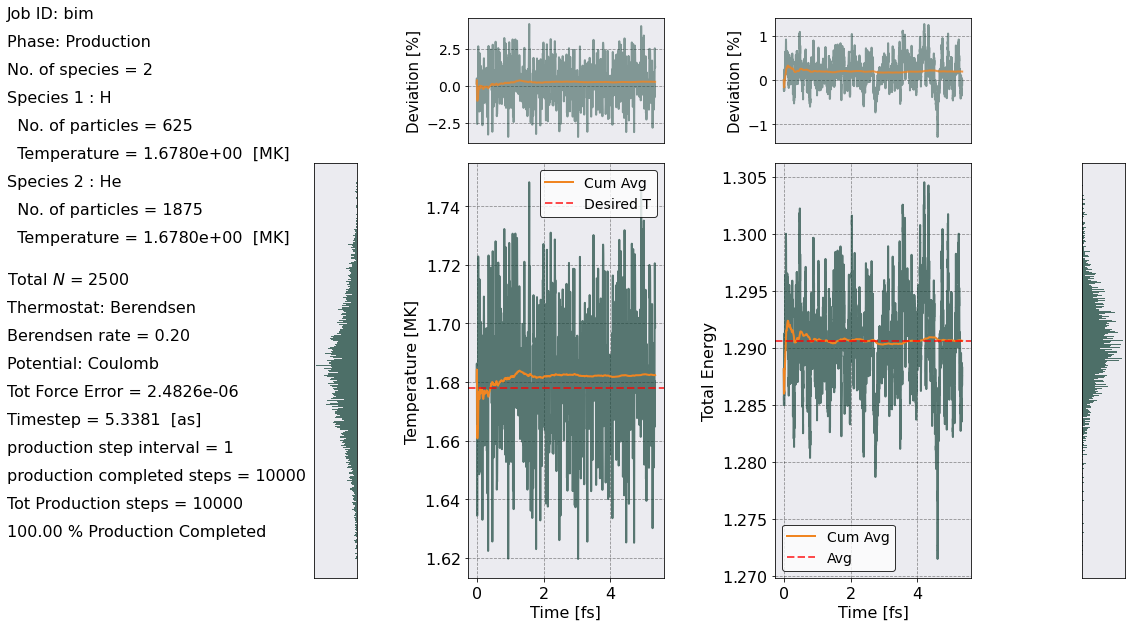

In [5]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')

<AxesSubplot:xlabel='$r / a_{\\rm ws}$'>

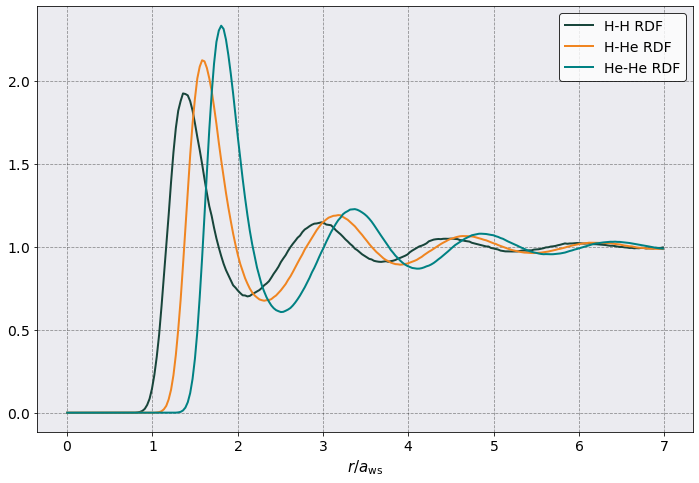

In [6]:
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
postproc.rdf.plot(normalization = postproc.parameters.a_ws, 
                  xlabel = r'$r / a_{\rm ws}$')

<AxesSubplot:xlabel='$\\omega/\\omega_p$'>

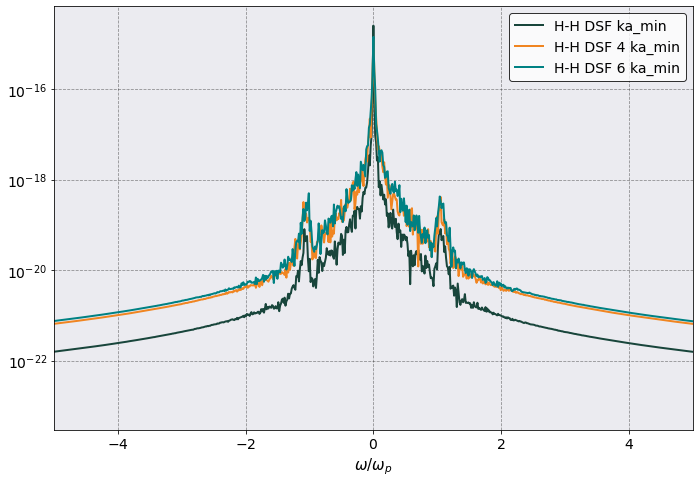

In [7]:
postproc.dsf.setup(postproc.parameters)
postproc.dsf.parse()
postproc.dsf.plot(normalization=postproc.dsf.total_plasma_frequency,
                  y = ['H-H DSF ka_min','H-H DSF 4 ka_min', 'H-H DSF 6 ka_min'],
                  xlabel = r'$\omega/\omega_p$',
                  xlim = (-5,5),
                  logy = True)

<AxesSubplot:xlabel='$\\omega/\\omega_p$'>

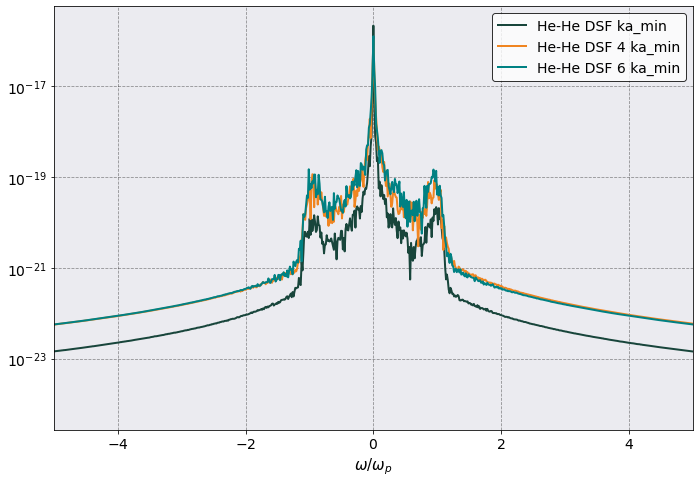

In [8]:
postproc.dsf.plot(normalization=postproc.dsf.total_plasma_frequency,
                  y = ['He-He DSF ka_min', 'He-He DSF 4 ka_min', 'He-He DSF 6 ka_min'],
                  xlabel = r'$\omega/\omega_p$',
                  xlim = (-5,5),
                  logy = True)